# Data'yı Hazırlamak

In [1]:
#Google Drive bağlantısı kullanılarak paylaşılan verisetine ulaşıyoruz
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Kod boyunca kullanılacak bazı constant'ları tanımlıyoruz

#Görüntü boyutlarını 224 olarak belirliyoruz. Bu sayı hem iş yükünü azaltıyor
#hem de görüntüdeki özelliklerin korunmasını sağlıyor
IMG_SIZE = 224
seed = 42

NUM_CLASSES = 4
BATCH_SIZE = 32
EPOCHS = 20

CLASSES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

In [4]:
#Veri setleri zip dosyaları içinde paylaşılmış.
#Bu nedenle ilk öncelikle zip dosyasını unzip ediyoruz

from zipfile import ZipFile

data_zip = '/content/drive/My Drive/Corn Disease.zip'

with ZipFile(data_zip, 'r') as zObject:
  data = zObject.extractall()

DATA_PATH = '/content/data/'

In [5]:
import cv2

main_data = []
training_data = []
test_data = []
validation_data = []

def creating_main_data_array():
  #Bu fonksiyon ile verisetindeki resimlerden özellik çıkartıp
  #yanlarına resmin sınıfını ekleyeceğiz

  for class_name in CLASSES:
    path = os.path.join(DATA_PATH, class_name)
    print(path)
    class_num = CLASSES.index(class_name)

    #Burada for döngüsü ile dosyalardaki tüm resimlerden bilgilerini çıkartıyoruz
    #ardından çıkartılan özellikleri ve resmin sınıfını main_data listesine ekliyoruz
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        main_data.append([new_array, class_num])
      except Exception as e:
        print(e)

In [6]:
#Önceden yazdığımız fonksiyonu çalıştırarak main_data listemizi oluşturuyoruz.
#Bu listenin her bir ögesi bir resmin bilgisini ve resmin sınıfını taşıyor.
#[[görsel_bilgisi][sınıf_no]]
creating_main_data_array()
print(len(main_data))

/content/data/Blight
/content/data/Common_Rust
/content/data/Gray_Leaf_Spot
/content/data/Healthy
4188


In [7]:
import random

random.seed(789)
random.shuffle(main_data)

#Modelimizi eğitmek ve ardından eğitilen modeli test etmek/doğrulamak için
#ana veri setirini train, test ve validation olarak ayırmamız gerekiyor
#Burada %80 train %20 test ve train veri seti içinden %10 validation olacak şekilde setleri ayıracağız

#Ayırma işlemi için split kullanıyoruz. Bu sayede veri belirli oranlarda iki parçaya ayrılabiliyor

split_1 = int(0.8 * len(main_data))
split_2 = int(0.2 * len(main_data))

training_data = main_data[:split_1]
test_data = main_data[split_1:]

split_3 = int(0.1 * len(training_data))
#Verilerin homojen dağılmaması için random kütüğhanesi kullanarak listeleri karıştırıyoruz
random.shuffle(training_data)
validation_data = training_data[:split_3]
training_data = training_data[split_3:]

print("Training Lenght:", len(training_data))
print("Rest Lenght:", len(test_data))
print("Validataion Lenght:", len(validation_data))
print("Toplam Veriseti Büyüklüğü", len(main_data))

Training Lenght: 3015
Rest Lenght: 838
Validataion Lenght: 335
Toplam Veriseti Büyüklüğü 4188


###### Ana Veri Seti İçin ######
Blight Sınıfına Sahip Örnek Sayısı: 1146 
Common Rust Sınıfına Sahip Örnek Sayısı: 1306 
Gray Leaf Spot Sınıfına Sahip Örnek Sayısı: 574 
Healthy Sınıfına Sahip Örnek Sayısı: 1162 


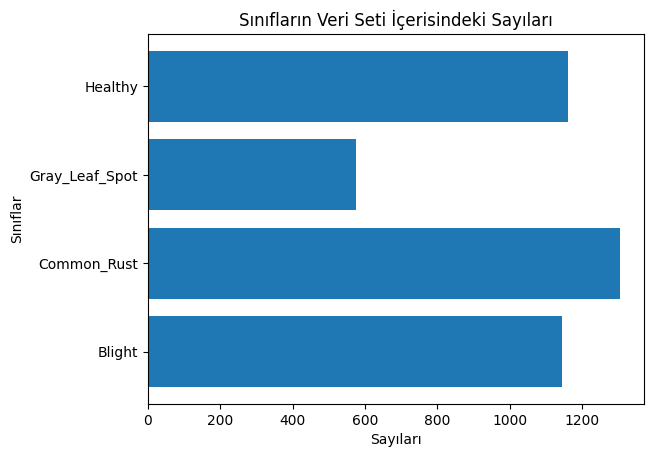

Toplam Uzunluk: 4188

###### Train Veri Seti İçin ######
Blight Sınıfına Sahip Örnek Sayısı: 820 
Common Rust Sınıfına Sahip Örnek Sayısı: 927 
Gray Leaf Spot Sınıfına Sahip Örnek Sayısı: 415 
Healthy Sınıfına Sahip Örnek Sayısı: 853 


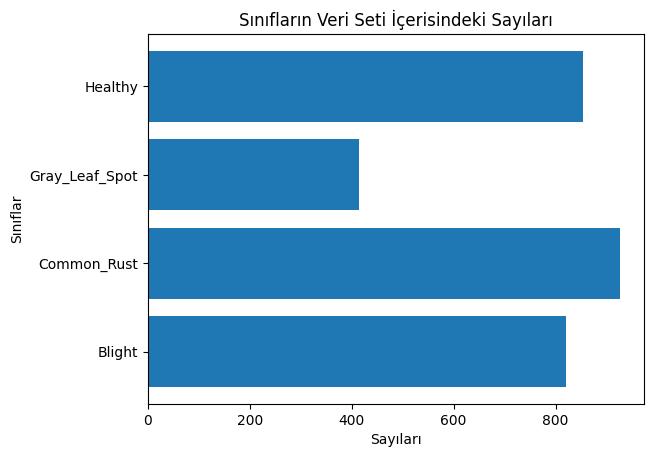

Toplam Uzunluk: 3015

###### Validataion Veri Seti İçin ###### 
Blight Sınıfına Sahip Örnek Sayısı: 104 
Common Rust Sınıfına Sahip Örnek Sayısı: 112 
Gray Leaf Spot Sınıfına Sahip Örnek Sayısı: 44 
Healthy Sınıfına Sahip Örnek Sayısı: 75 


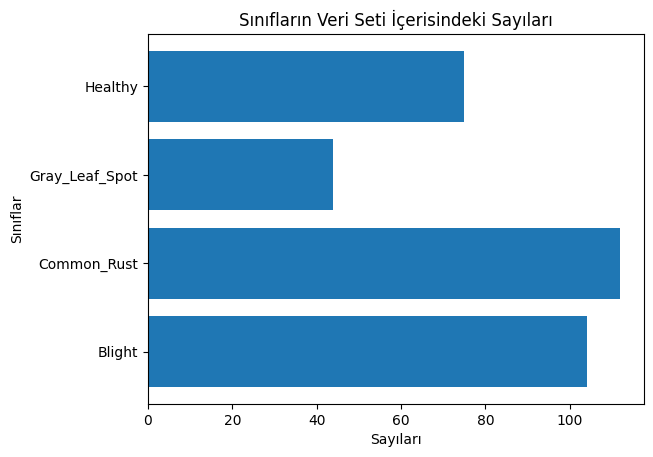

Toplam Uzunluk: 335

###### Test Veri Seti İçin ######
Blight Sınıfına Sahip Örnek Sayısı: 222 
Common Rust Sınıfına Sahip Örnek Sayısı: 267 
Gray Leaf Spot Sınıfına Sahip Örnek Sayısı: 115 
Healthy Sınıfına Sahip Örnek Sayısı: 234 


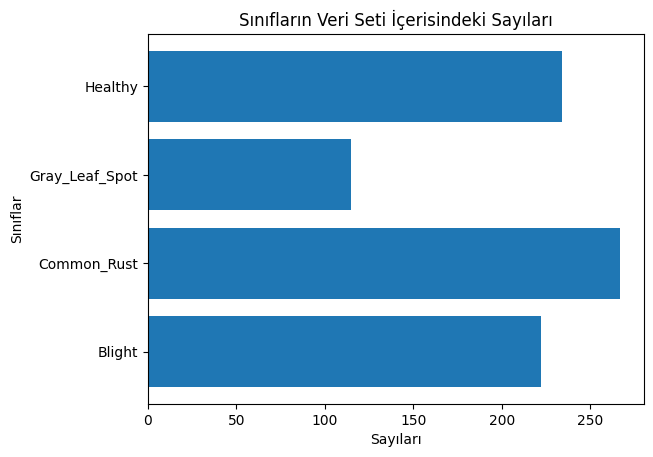

Toplam Uzunluk: 838


In [8]:
#Veri setini train, test, validation olarak böldük.
#Bu 3 ayrı veri setinde hangi sınıftan kaçar tane olduğunu bulmak amacıyla bir fonksiyon yazıyoruz

def count_classes(array, plot=False):
  class_0_cnt = 0
  class_1_cnt= 0
  class_2_cnt= 0
  class_3_cnt= 0
  class_counts=[]

  #Fonksiyon for döngüsü ile girilen veri setindeki tüm elemanları geziyor ve listenin
  #elemanlarının sınıf bilgilerine göre sayılarını alıyor
  for i in range(len(array)):
    if array[i][1]==0:
      class_0_cnt += 1
    elif array[i][1]==1:
      class_1_cnt += 1
    elif array[i][1]==2:
      class_2_cnt += 1
    else:
      class_3_cnt += 1
  class_counts.append(class_0_cnt)
  class_counts.append(class_1_cnt)
  class_counts.append(class_2_cnt)
  class_counts.append(class_3_cnt)

  print(f"Blight Sınıfına Sahip Örnek Sayısı: {class_0_cnt} ")
  print(f"Common Rust Sınıfına Sahip Örnek Sayısı: {class_1_cnt} ")
  print(f"Gray Leaf Spot Sınıfına Sahip Örnek Sayısı: {class_2_cnt} ")
  print(f"Healthy Sınıfına Sahip Örnek Sayısı: {class_3_cnt} ")

  #Bura pyplot kütüphanesi ile görselleştirme yapıyoruz
  if plot:
    plt.barh(CLASSES, class_counts )
    plt.ylabel("Sınıflar")

    plt.xlabel("Sayıları")
    plt.title("Sınıfların Veri Seti İçerisindeki Sayıları")
    plt.show()

print("###### Ana Veri Seti İçin ######")
count_classes(main_data, plot=True)
print("Toplam Uzunluk:", len(main_data))

print("\n###### Train Veri Seti İçin ######")
count_classes(training_data, plot=True)
print("Toplam Uzunluk:", len(training_data))

print("\n###### Validataion Veri Seti İçin ###### ")
count_classes(validation_data, plot=True)
print("Toplam Uzunluk:", len(validation_data))

print("\n###### Test Veri Seti İçin ######")
count_classes(test_data, plot=True)
print("Toplam Uzunluk:", len(test_data))

In [9]:
#Veri setimizi train, test, validation olarak ayırdık ancak
#modelin tahmin ve sınıflandırma yapabilmesi için bir de target(hedef)
#ve diğer özellikler(bağımsız değişkenler) şeklinde ayrım yapmamız gerekiyor
#Bunun için veri setlerini X ve Y olarak bölmemiz gerekiyor

X_training_data = []
y_training_data = []

#for dönügüsü veri seti içinde dolaşarak [[görsel_bilgisi][sınıf_no]]
#şeklinde olan verileri X ve Y olarak ayırıyor.
for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [10]:
X_test_data = []
y_test_data = []

for classes, label in test_data:
  X_test_data.append(classes)
  y_test_data.append(label)

In [11]:
X_validation_data = []
y_validation_data = []

for classes, label in validation_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

In [12]:
#Modelin daha iyi çalışması için listeleri
#numpy array'ine çeviriyoruz
x_train = np.array(X_training_data)
x_test = np.array(X_test_data)

y_train = np.array(y_training_data)
y_test = np.array(y_test_data)

x_val = np.array(X_validation_data)
y_val = np.array(y_validation_data)

In [13]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", x_val.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (3015, 224, 224, 3)
y_train shape: (3015,)
X_test shape: (838, 224, 224, 3)
y_test shape: (838,)
X_validation shape: (335, 224, 224, 3)
y_validation shape: (335,)


In [14]:
#Burada modelin performansını arttırmak ve tahmin yapabilmesini kolaylaştırmak adına
#normalizasyon işlemi yapıyoruz
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

In [15]:
#Burada Y veri setlerine yani label(etiket/sınıf bilgisi)
#one-hot encoding işlemi yapıyoruz

#Burada one-hot encoding her bir sınıfın vektöre dönüşmesini sağlıyor
#Yani label=1 vektörel hale getirilip [0,1,0,0] oluyor
#label(y) = 2 [0,0,2,0] oluyor gibi

#Eğer modelde çıktı katmanında softmax buşunuyorsa, tahminler bir olasılık dağılımı (vektör) olarak döner.
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)

# **CNN**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

# ilk katman. Burada Conv2D uyguluyoruz, Conv2D 2D evrişim (convolution) işlemi uyguluyor.
# görüntülerdeki uzamsal özellikleri (kenar, desen vb.) çıkarmak için kullanılır.
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

model.add(MaxPooling2D(pool_size=(2,2)))
#MaxPooling, bir görüntüdeki her küçük bölgedeki en yüksek değeri
#seçerek verinin boyutunu küçültür ve hesaplama maliyetini azaltır
model.add(BatchNormalization())
#BatchNormalization modelin her katmanındaki aktivasyonları ortalama 0, standart sapma 1 olacak şekilde ölçekler.
#Bu sayede öğrenme işlemini hızlandırı

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


# Flatten katmanı
# Bu katman çok boyutlu veriyi tek boyutlu hale getiriyor
# Yani öncesinde gelen vektör burada tek boyuta ulaşıyor
# Çıkarılan özellikleri Dense layer'ına bağlamak için kullanılır
model.add(Flatten())

# Fully Connected Layer
# Dense ile her bağlantı için bir ağırlık ve bias değeri öğrenilir.
# Aktivasyon fonksiyonu ile çıktılar hesaplanır.
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
# Dropout modelin her eğitim adımında girilen oranda  rastgele nöronları devre dışı bıramasını sağlar.
# Burada %40 olarak belirlenmiş
# Bu sayede overfitting durumunun önüne geçilmeye çalışılır.

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Relu fonksiyonu daha hızlı öğrenme sağlar ve pozitif değerleri tutar

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))
# Softmax, çok sınıflı sınıflandırma görevlerinde son katmanda kullanılır
# Her sınıfa ait olası doğruluk değerlerini (0-1 arasında) döndürür.
# Tüm çıktıların toplamı 1 olur ve en yüksek değer tahmin edilen sınıfı belirtir.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Modeli eğitmek ardından tahmin yaptırabilmek için ilk öncelikle modelimizi compile etmemiz gerekiyor

# Adam öğrenme hızını otomatik olarak ayarlayan bir optimizasyon algoritmasıdır.

#Categorical Crossentropy, çok sınıflı sınıflandırma problemlerinde kullanılan bir kayıp fonksiyonudur.
#Modelin çıktısı, her sınıf için bir olasılık vektörü olduğunda kullanılır ve doğru sınıf ile tahmin edilen sınıf arasındaki farkı ölçer.
#Eğer ikili sınıflandırma problemi olsaydı binary_crossentropy kullanılabilirdi. B
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Burada modelin özetini elde ediyoruz
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      22,152,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │              

 Total params: 22,910,660 (87.40 MB)

 Trainable params: 22,906,628 (87.38 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [19]:
#Burada bir callback_list oluşturarak early stopiing belirliyoruz. Early stopping modelin
#belirli bir gelişme performansı gösterince kaydedilmesini sağlıyor. Bu sayede overfitting
#engellenebiliyor
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 5,
        verbose = 1
    )
]

In [20]:
#Modelimizi eğitiyoruz
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7759 - loss: 0.5628
Epoch 1: val_loss improved from inf to 12.51898, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 36s 225ms/step - accuracy: 0.7763 - loss: 0.5618 - val_accuracy: 0.2239 - val_loss: 12.5190
Epoch 2/20
94/95 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8825 - loss: 0.3075
Epoch 2: val_loss improved from 12.51898 to 9.66811, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.8824 - loss: 0.3076 - val_accuracy: 0.2239 - val_loss: 9.6681
Epoch 3/20
94/95 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9040 - loss: 0.2545
Epoch 3: val_loss improved from 9.66811 to 7.06281, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9041 - loss: 0.2543 - val_accuracy: 0.2239 - val_loss: 7.0628
Epoch 4/20
94/95 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9203 - loss: 0.1955
Epoch 4: val_loss improved from 7.06281 to 1.60945,

<Figure size 640x480 with 0 Axes>

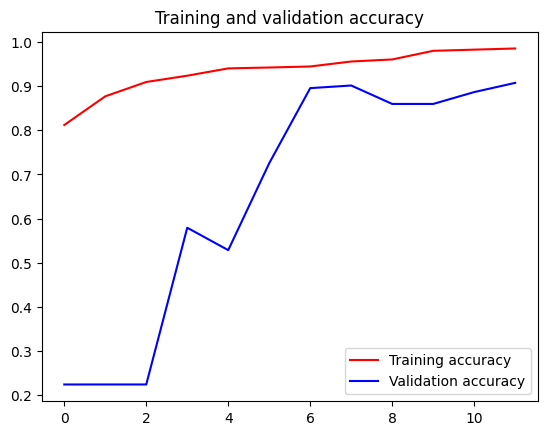

<Figure size 640x480 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# **CNN MODEL EVALUATION**

In [22]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, balanced_accuracy_score, matthews_corrcoef, recall_score

In [23]:
train_score = model.evaluate(x_train, y_train)

test_score = model.evaluate(x_test, y_test)

val_score = model.evaluate(x_val, y_val)

print("Train Accuracy", train_score[1])
print("Test Accuracy", test_score[1])
print("Validation Accuracy", val_score[1])

95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9905 - loss: 0.0239
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9120 - loss: 0.3873
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9003 - loss: 0.4889
Train Accuracy 0.9893863797187805
Test Accuracy 0.9081145524978638
Validation Accuracy 0.9074627161026001


In [24]:
y_train_pred = model.predict(x_train)
y_train_pred_classes = y_train_pred.argmax(axis=1)
y_train_true_classes = y_train.argmax(axis=1)

print(classification_report(y_train_true_classes, y_train_pred_classes, target_names=CLASSES))


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
                precision    recall  f1-score   support

        Blight       0.97      1.00      0.98       820
   Common_Rust       1.00      1.00      1.00       927
Gray_Leaf_Spot       0.99      0.94      0.97       415
       Healthy       1.00      1.00      1.00       853

      accuracy                           0.99      3015
     macro avg       0.99      0.98      0.99      3015
  weighted avg       0.99      0.99      0.99      3015



In [25]:
y_val_pred = model.predict(x_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_val_true_classes = y_val.argmax(axis=1)

print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=CLASSES))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
                precision    recall  f1-score   support

        Blight       0.83      0.92      0.87       104
   Common_Rust       0.96      0.97      0.97       112
Gray_Leaf_Spot       0.80      0.55      0.65        44
       Healthy       0.99      1.00      0.99        75

      accuracy                           0.91       335
     macro avg       0.89      0.86      0.87       335
  weighted avg       0.91      0.91      0.90       335



In [26]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=CLASSES))

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
                precision    recall  f1-score   support

        Blight       0.83      0.87      0.85       222
   Common_Rust       0.96      0.95      0.95       267
Gray_Leaf_Spot       0.77      0.70      0.73       115
       Healthy       0.99      1.00      0.99       234

      accuracy                           0.91       838
     macro avg       0.89      0.88      0.88       838
  weighted avg       0.91      0.91      0.91       838



# Test Accuracy, Precision, Sensivity, F1

In [27]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

report = classification_report(y_test_classes, y_test_pred_classes, target_names=CLASSES)

print(report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
                precision    recall  f1-score   support

        Blight       0.83      0.87      0.85       222
   Common_Rust       0.96      0.95      0.95       267
Gray_Leaf_Spot       0.77      0.70      0.73       115
       Healthy       0.99      1.00      0.99       234

      accuracy                           0.91       838
     macro avg       0.89      0.88      0.88       838
  weighted avg       0.91      0.91      0.91       838



# Test MCC Mahtewss Corelation Coefficient

In [28]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

mcc = matthews_corrcoef(y_test_classes, y_test_pred_classes)

print(f"Matthews Correlation Coefficient (MCC): {mcc}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Matthews Correlation Coefficient (MCC): 0.8743507717005307


# Test Balanced Accuracy

In [29]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

balanced_acc = balanced_accuracy_score(y_test_classes, y_test_pred_classes)

print(f"Balanced Accuracy: {balanced_acc}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Balanced Accuracy: 0.8791408512341585


# Test Roc-Auc Score

In [30]:
from sklearn.preprocessing import label_binarize

y_test_classes = np.argmax(y_test, axis=1)

y_pred_prob = model.predict(x_test)

y_test_binarized = label_binarize(y_test_classes, classes=[0,1,2,3])

roc_auc_multi = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score (Multi-class): {roc_auc_multi}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ROC AUC Score (Multi-class): 0.9748558057433665


# CNN Classification Report

In [31]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=CLASSES))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
                precision    recall  f1-score   support

        Blight       0.83      0.87      0.85       222
   Common_Rust       0.96      0.95      0.95       267
Gray_Leaf_Spot       0.77      0.70      0.73       115
       Healthy       0.99      1.00      0.99       234

      accuracy                           0.91       838
     macro avg       0.89      0.88      0.88       838
  weighted avg       0.91      0.91      0.91       838



# CNN Confusion Matrix

In [32]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

cm = confusion_matrix(y_test_classes, y_test_pred_classes)
print(cm)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[194   8  18   2]
 [  7 254   6   0]
 [ 33   2  80   0]
 [  0   1   0 233]]


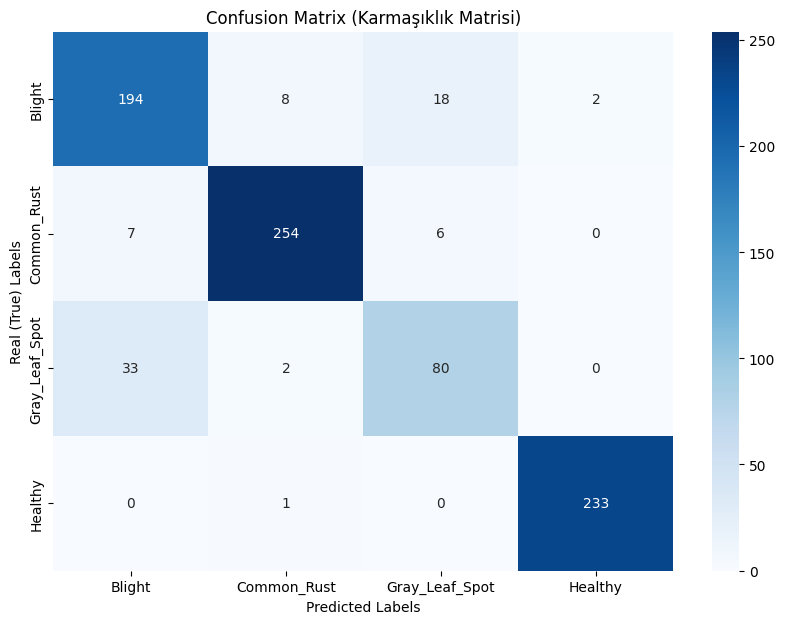

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Predicted Labels")
plt.ylabel("Real (True) Labels")
plt.show()

# CNN ROC Graph

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


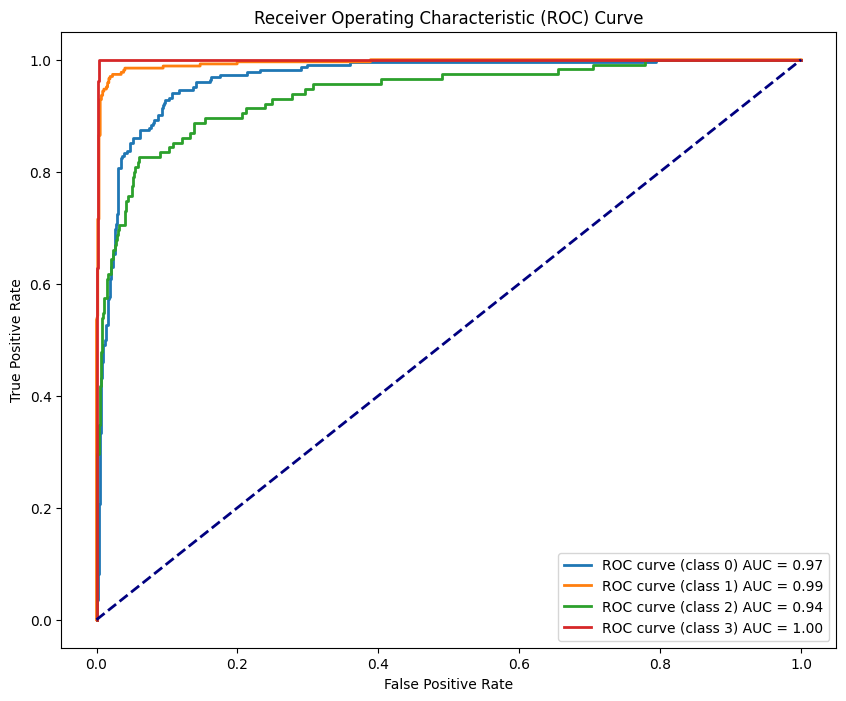

Mean AUC: 0.9749


In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Gerçek etiketler (sınıf sayısını belirtmek için 4 sınıf var)
y_test_classes = np.argmax(y_test, axis=1)  # Gerçek sınıflar (etiketler)
y_pred = model.predict(x_test)
y_pred_probabilities = y_pred  # Olasılıkları alıyoruz

# Sınıf etiketlerini ikili hale getiriyoruz (binarize) çünkü ROC için gereklidir
y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2, 3])  # Sınıflar: 0, 1, 2, 3
n_classes = y_test_bin.shape[1]  # Sınıf sayısı

# ROC eğrisini çizmek için her sınıf için ROC eğrisini hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC eğrisini çiziyoruz
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.2f}'.format(i, roc_auc[i]))

# Diagonal çizgiyi çiziyoruz (rastgele tahminin grafiği)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik etiketlerini ve başlığını ekliyoruz
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ortalama AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.4f}')

In [35]:
print(f'Mean AUC: {mean_auc:.4f}')

Mean AUC: 0.9749
